#1. 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.ticker as mticker
import matplotlib.colors as colors
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DDUNIVDATA.csv", encoding='utf-8')

#2. 데이터 전처리

In [ ]:
print(df.shape)
df.head()

(118176, 10)


,yyyymm,sex,age,cst_addr_no,weekend,aftern,lclss,sale_qty,sale_amt,sale_cnt
0,202307,1,1,NaN,1,0,5,29.0,81200.0,25
1,202307,1,1,NaN,1,1,5,69.0,259700.0,61
2,202307,1,1,NaN,0,0,6,749.0,3350600.0,686
3,202307,1,1,NaN,0,1,6,1984.0,9040200.0,1779
4,202307,1,1,11.0,1,0,99,37.0,72800.0,33


In [ ]:
# 3. 데이터 기본 정보 확인
print("데이터 크기:", df.shape)
print("컬럼명:\n", df.columns)
print("상위 5행 미리보기:")
display(df.head())

데이터 크기: (118176, 10)
컬럼명:
 Index(['yyyymm', 'sex', 'age', 'cst_addr_no', 'weekend', 'aftern', 'lclss',
       'sale_qty', 'sale_amt', 'sale_cnt'],
      dtype='object')
상위 5행 미리보기:


,yyyymm,sex,age,cst_addr_no,weekend,aftern,lclss,sale_qty,sale_amt,sale_cnt
0,202307,1,1,NaN,1,0,5,29.0,81200.0,25
1,202307,1,1,NaN,1,1,5,69.0,259700.0,61
2,202307,1,1,NaN,0,0,6,749.0,3350600.0,686
3,202307,1,1,NaN,0,1,6,1984.0,9040200.0,1779
4,202307,1,1,11.0,1,0,99,37.0,72800.0,33


In [ ]:
# 결측치 확인
print("결측치 개수:\n", df.isnull().sum())

결측치 개수:
 yyyymm             0
sex                0
age                0
cst_addr_no    10673
weekend            0
aftern             0
lclss              0
sale_qty           0
sale_amt           0
sale_cnt           0
dtype: int64


In [ ]:
# 결측치가 있는 행 제거
df.dropna(inplace=True) # 결측값 제거

print(df.isnull().sum())

yyyymm         0
sex            0
age            0
cst_addr_no    0
weekend        0
aftern         0
lclss          0
sale_qty       0
sale_amt       0
sale_cnt       0
dtype: int64


In [ ]:
df.shape

(107503, 10)

In [ ]:
# 데이터 타입 및 기초 통계 확인
print("데이터 타입 정보:")
print(df.info())

print("수치형 기초 통계:")
display(df.describe())

데이터 타입 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 107503 entries, 4 to 118175
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   yyyymm       107503 non-null  int64  
 1   sex          107503 non-null  int64  
 2   age          107503 non-null  int64  
 3   cst_addr_no  107503 non-null  float64
 4   weekend      107503 non-null  int64  
 5   aftern       107503 non-null  int64  
 6   lclss        107503 non-null  int64  
 7   sale_qty     107503 non-null  float64
 8   sale_amt     107503 non-null  float64
 9   sale_cnt     107503 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 9.0 MB
None
수치형 기초 통계:


,yyyymm,sex,age,cst_addr_no,weekend,aftern,lclss,sale_qty,sale_amt,sale_cnt
count,107503.000000,107503.000000,107503.000000,107503.000000,107503.000000,107503.000000,107503.000000,107503.000000,1.075030e+05,107503.000000
mean,202353.910505,1.455615,2.812154,35.790992,0.429076,0.609760,13.558143,237.892384,5.712252e+05,175.163140
std,46.954058,0.498028,1.397595,12.395682,0.494947,0.487806,15.072845,1135.030327,3.622413e+06,821.447196
min,202307.000000,1.000000,1.000000,11.000000,0.000000,0.000000,1.000000,3.000000,1.000000e+02,3.000000
25%,202309.000000,1.000000,2.000000,28.000000,0.000000,0.000000,6.000000,8.000000,1.670000e+04,6.000000
50%,202312.000000,1.000000,3.000000,41.000000,0.000000,1.000000,11.000000,18.000000,3.960000e+04,14.000000
75%,202403.000000,2.000000,4.000000,47.000000,1.000000,1.000000,17.000000,62.000000,1.346000e+05,48.000000
max,202406.000000,2.000000,5.000000,52.000000,1.000000,1.000000,99.000000,36285.000000,1.568676e+08,25116.000000


In [ ]:
#전처리 (ColumnTransformer)

# 수치형 / 범주형 변수 구분
categorical_features = ['sex', 'age', 'cst_addr_no', 'weekend', 'aftern','lclss']
numeric_features = ['sale_qty', 'sale_amt', 'sale_cnt']

# ColumnTransformer 구성
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# 범주형 변수 요약 (범주형이 있을 경우)
print("각 범주형 변수의 고유값:")
for col in categorical_features:
    print(f"{col} 고유값:\n", df[col].value_counts().head(), "\n")

각 범주형 변수의 고유값:
sex 고유값:
 sex
1    58523
2    48980
Name: count, dtype: int64 

age 고유값:
 age
1    26263
4    22641
2    22233
3    20404
5    15962
Name: count, dtype: int64 

cst_addr_no 고유값:
 cst_addr_no
11.0    12180
41.0    11533
28.0     9335
26.0     7188
44.0     6824
Name: count, dtype: int64 

weekend 고유값:
 weekend
0    61376
1    46127
Name: count, dtype: int64 

aftern 고유값:
 aftern
1    65551
0    41952
Name: count, dtype: int64 

lclss 고유값:
 lclss
17    7968
16    7340
6     6616
22    6532
1     6439
Name: count, dtype: int64 



In [ ]:
# 오전(0), 오후(1)별 거래 건수
aftern_count = df['aftern'].value_counts().sort_index()
print(aftern_count)

# 비율까지 보기 쉽게 출력
aftern_ratio = (aftern_count / len(df) * 100).round(2)
print("\n오전/오후 비율(%)")
print(aftern_ratio)

aftern
0    41952
1    65551
Name: count, dtype: int64

오전/오후 비율(%)
aftern
0    39.02
1    60.98
Name: count, dtype: float64


#3. 탐색적 데이터 분석

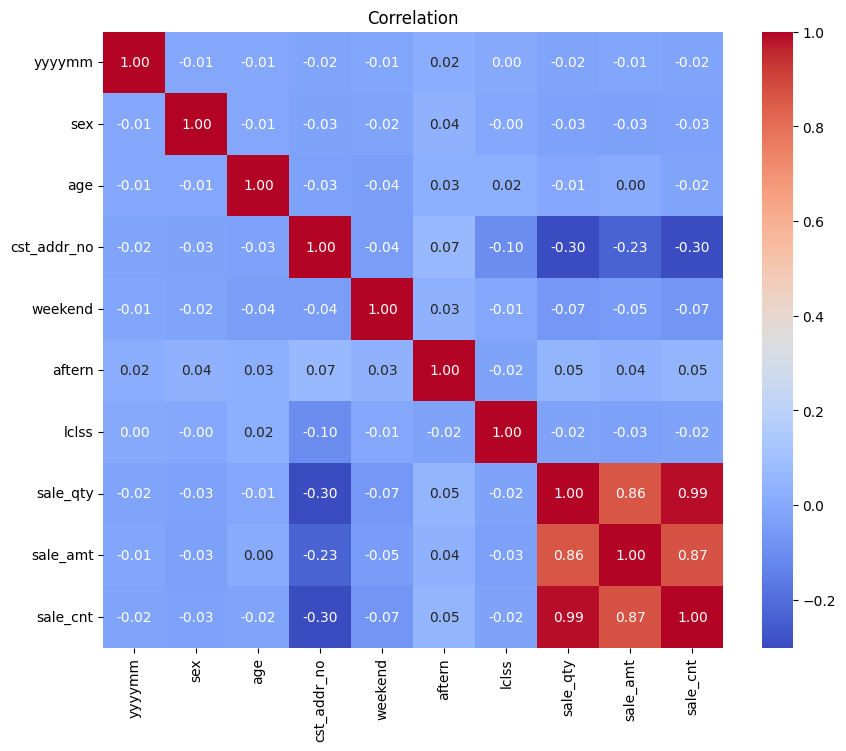

In [ ]:
# 변수 간 상관관계 확인
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation")
plt.show()

In [ ]:
weekend_sale = df.groupby('weekend')['sale_amt'].mean().reset_index()
weekend_sale

,weekend,sale_amt
0,0,729730.008472
1,1,360320.751404


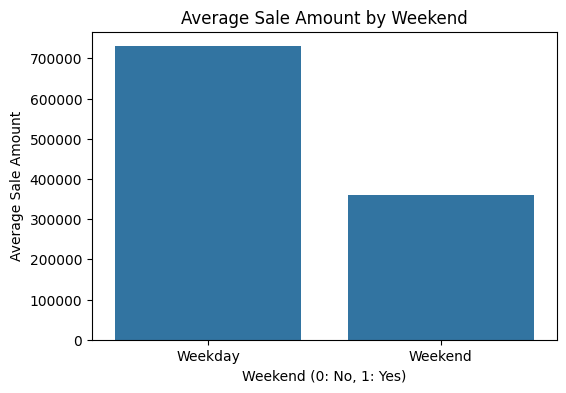

In [ ]:
# weekend 여부에 따른 sale_amt 막대그래프
weekend_sale = df.groupby('weekend')['sale_amt'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='weekend', y='sale_amt', data=weekend_sale)
plt.title('Average Sale Amount by Weekend')
plt.xlabel('Weekend (0: No, 1: Yes)')
plt.ylabel('Average Sale Amount')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

In [ ]:
# 오전/오후별 거래 수, 비율, 평균 매출액
aftern_summary = (
    df.groupby('aftern')['sale_amt']
      .agg(['count', 'sum', 'mean'])
      .rename(index={0: 'Morning', 1: 'Afternoon'})
)
aftern_summary['ratio(%)'] = (aftern_summary['count'] / len(df) * 100).round(2)
print("=== 오전/오후별 거래 현황 ===")
print(aftern_summary)

=== 오전/오후별 거래 현황 ===
           count           sum           mean  ratio(%)
aftern                                                 
Morning    41952  1.683583e+10  401311.818268     39.02
Afternoon  65551  4.457259e+10  679968.130158     60.98


/tmp/ipython-input-3285963476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='aftern', y='sale_amt', palette='coolwarm')


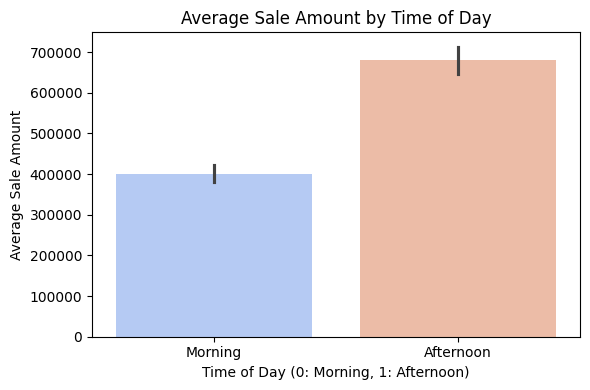

In [ ]:
# 시각화
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='aftern', y='sale_amt', palette='coolwarm')
plt.title('Average Sale Amount by Time of Day')
plt.xlabel('Time of Day (0: Morning, 1: Afternoon)')
plt.ylabel('Average Sale Amount')
plt.xticks([0, 1], ['Morning', 'Afternoon'])
plt.tight_layout()
plt.show()

In [ ]:
# 주중/주말별 거래 수, 비율, 평균 매출액
weekend_summary = (
    df.groupby('weekend')['sale_amt']
      .agg(['count', 'sum', 'mean'])
      .rename(index={0: 'Weekday', 1: 'Weekend'})
)
weekend_summary['ratio(%)'] = (weekend_summary['count'] / len(df) * 100).round(2)
print("\n=== 주중/주말별 거래 현황 ===")
print(weekend_summary)



=== 주중/주말별 거래 현황 ===
         count           sum           mean  ratio(%)
weekend                                              
Weekday  61376  4.478791e+10  729730.008472     57.09
Weekend  46127  1.662052e+10  360320.751404     42.91


In [ ]:
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

Text(0, 0.5, 'Count')

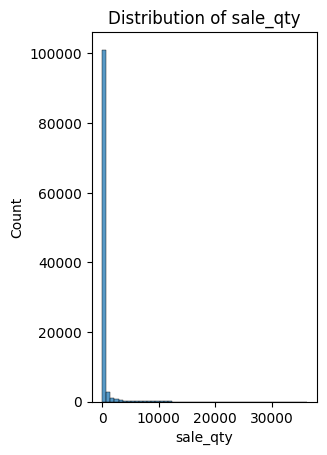

In [ ]:
# 각 거래에서 몇 개의 상품이 팔렸는지
plt.subplot(1, 2, 1)
sns.histplot(df['sale_qty'], bins=50, kde=False)
plt.title('Distribution of sale_qty')
plt.xlabel('sale_qty')
plt.ylabel('Count')

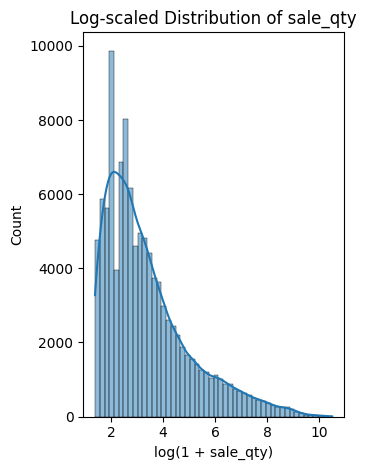

In [ ]:
# 각 거래에서 몇 개의 상품이 팔렸는지 로그 변환 분포
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['sale_qty']), bins=50, kde=True)
plt.title('Log-scaled Distribution of sale_qty')
plt.xlabel('log(1 + sale_qty)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# AGE 코드 → 영어 라벨로 매핑
age_labels = {
    1: "Under 20s",
    2: "30s",
    3: "40s",
    4: "50s",
    5: "60s and above"
}
df['age_label'] = df['age'].map(age_labels)

/tmp/ipython-input-3191508811.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age_label', palette='pastel')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Under 20s'),
  Text(1, 0, '30s'),
  Text(2, 0, '40s'),
  Text(3, 0, '50s'),
  Text(4, 0, '60s and above')])

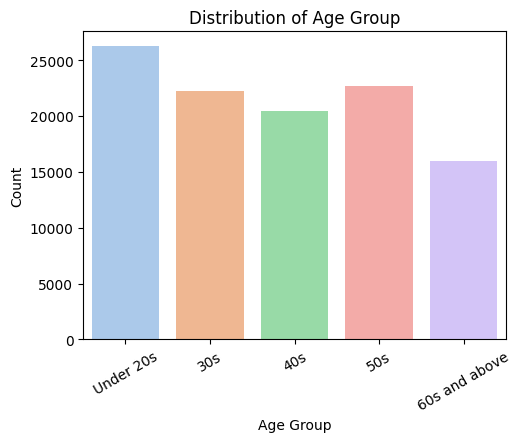

In [ ]:
#연령대별 고객 수(거래 수)의 분포
# 그래프 설정
plt.figure(figsize=(12, 4))

# 연령대별 데이터 수 (빈도분포)
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='age_label', palette='pastel')
plt.title("Distribution of Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=30)

/tmp/ipython-input-3760724626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='age_label', y='sale_amt', palette='pastel')


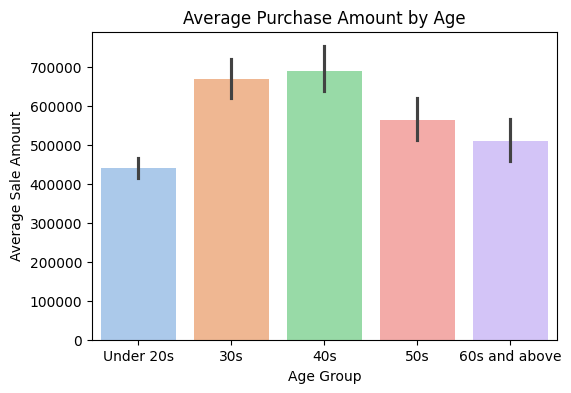

In [ ]:
#연령대별 평균 구매 금액
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='age_label', y='sale_amt', palette='pastel')

plt.title('Average Purchase Amount by Age')
plt.xlabel('Age Group')
plt.ylabel('Average Sale Amount')
plt.show()


/tmp/ipython-input-3042620325.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='sex', y='sale_amt', palette='Set2')


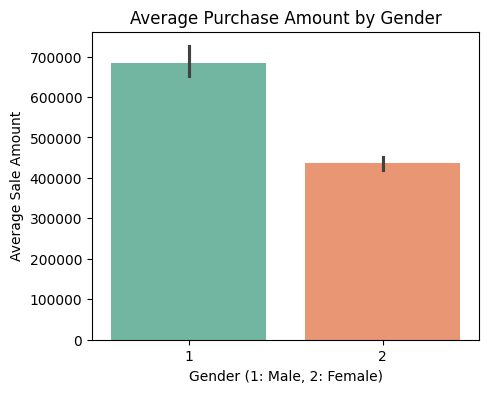

In [ ]:
#성별별 평균 구매금액 비교
plt.figure(figsize=(5,4))
sns.barplot(data=df, x='sex', y='sale_amt', palette='Set2')
plt.title("Average Purchase Amount by Gender")
plt.xlabel("Gender (1: Male, 2: Female)")
plt.ylabel("Average Sale Amount")
plt.show()

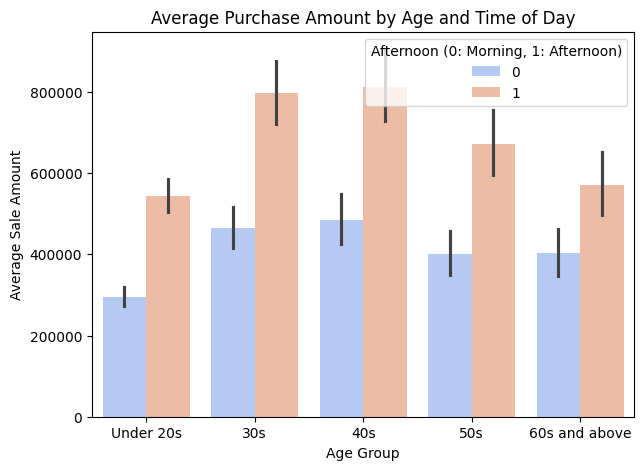

In [ ]:
#연령대 × 시간대 (교차 그래프)
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='age_label', y='sale_amt', hue='aftern', palette='coolwarm')
plt.title("Average Purchase Amount by Age and Time of Day")
plt.xlabel("Age Group")
plt.ylabel("Average Sale Amount")
plt.legend(title="Afternoon (0: Morning, 1: Afternoon)")
plt.show()

In [ ]:
# lclss 코드 → 영어 라벨로 매핑
lclss_labels = {
    '01': 'Processed Food',
    '02': 'Electronics & Culture',
    '03': 'Instant Food',
    '04': 'Snacks',
    '05': 'Luxury Food',
    '06': 'Tobacco',
    '07': 'Beer & Soju',
    '08': 'Rice Meals',
    '09': 'Bakery & Desserts',
    '10': 'Household Goods',
    '11': 'Services',
    '12': 'Supplies',
    '13': 'Fresh Food',
    '14': 'Ice Cream',
    '15': 'Wine & Liquor',
    '16': 'Dairy Products',
    '17': 'Beverages',
    '18': 'Daily Necessities',
    '19': 'Cooked Bread',
    '20': 'Alcoholic Beverages',
    '21': 'Instant Meals',
    '22': 'Candy & Chocolate',
    '23': 'Coffee/Tea & Health Drinks',
    '24': 'Health & Beauty',
    '99': 'Others'
}
df['lclss'] = df['lclss'].astype(int).astype(str).str.zfill(2)
df['lclss_label'] = df['lclss'].map(lclss_labels)
print(df[['lclss', 'lclss_label']].head())

  lclss        lclss_label
4    99             Others
5    99             Others
6    18  Daily Necessities
7    18  Daily Necessities
8    03       Instant Food


/tmp/ipython-input-2674858333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='lclss_label', y='sale_amt', palette='muted')


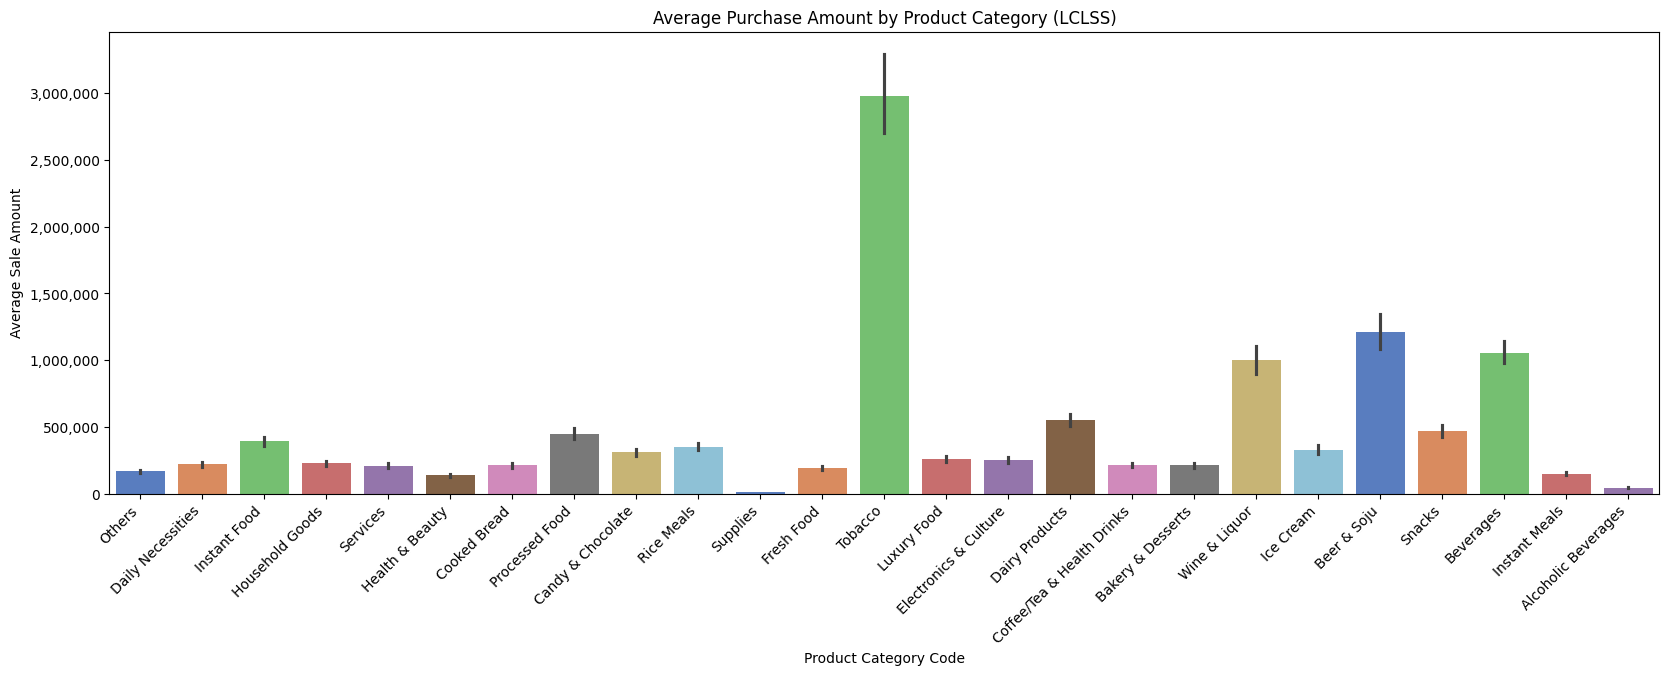

In [ ]:
#품목대분류(lclss)별 평균 구매금액
plt.figure(figsize=(20,6))
sns.barplot(data=df, x='lclss_label', y='sale_amt', palette='muted')
plt.title("Average Purchase Amount by Product Category (LCLSS)")
plt.xlabel("Product Category Code")
plt.xticks(rotation=45, ha='right', fontsize=10)  # 45도 회전 + 오른쪽 정렬
plt.ylabel("Average Sale Amount")
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

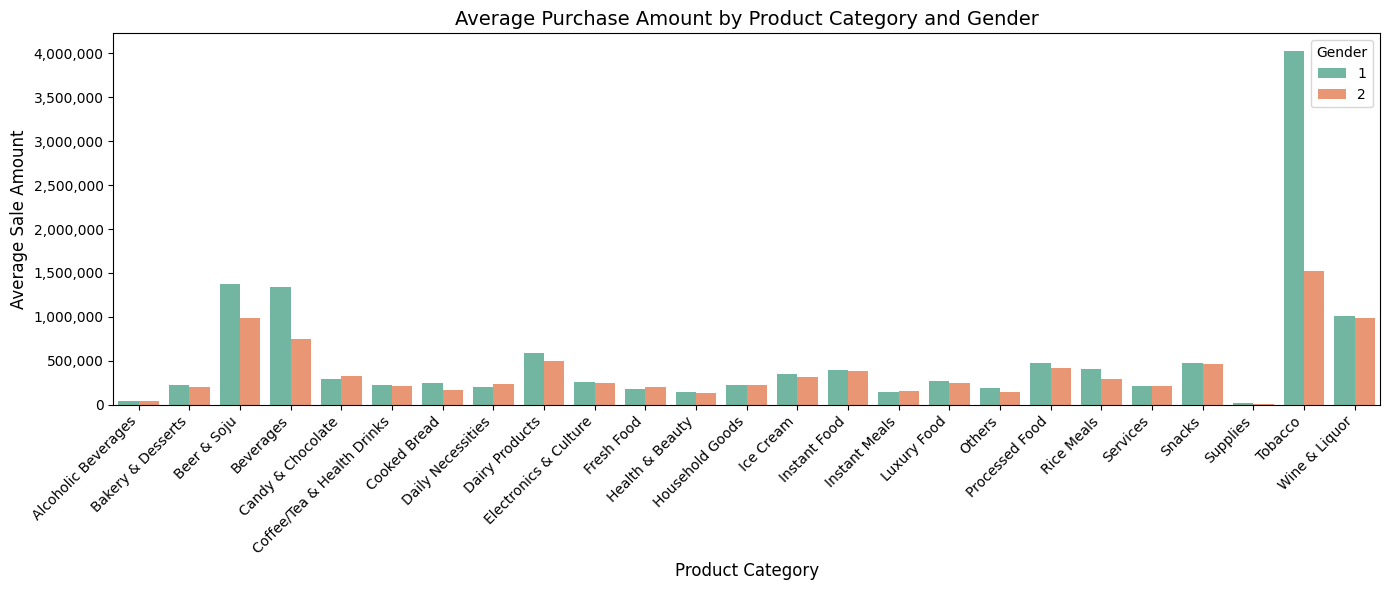

In [ ]:
# 성별에 따른 평균 구매금액 계산
category_sex_mean = (
    df.groupby(['lclss_label', 'sex'])['sale_amt']
    .mean()
    .reset_index()
)

# 시각화
plt.figure(figsize=(14, 6))
sns.barplot(data=category_sex_mean, x='lclss_label', y='sale_amt', hue='sex', palette='Set2')

plt.title("Average Purchase Amount by Product Category and Gender", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Average Sale Amount", fontsize=12)
plt.xticks(rotation=45, ha='right')

# y축 천단위 콤마 표시
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(title='Gender')
plt.tight_layout()
plt.show()

/tmp/ipython-input-458297369.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x='lclss_label', y='sale_amt', palette='muted')


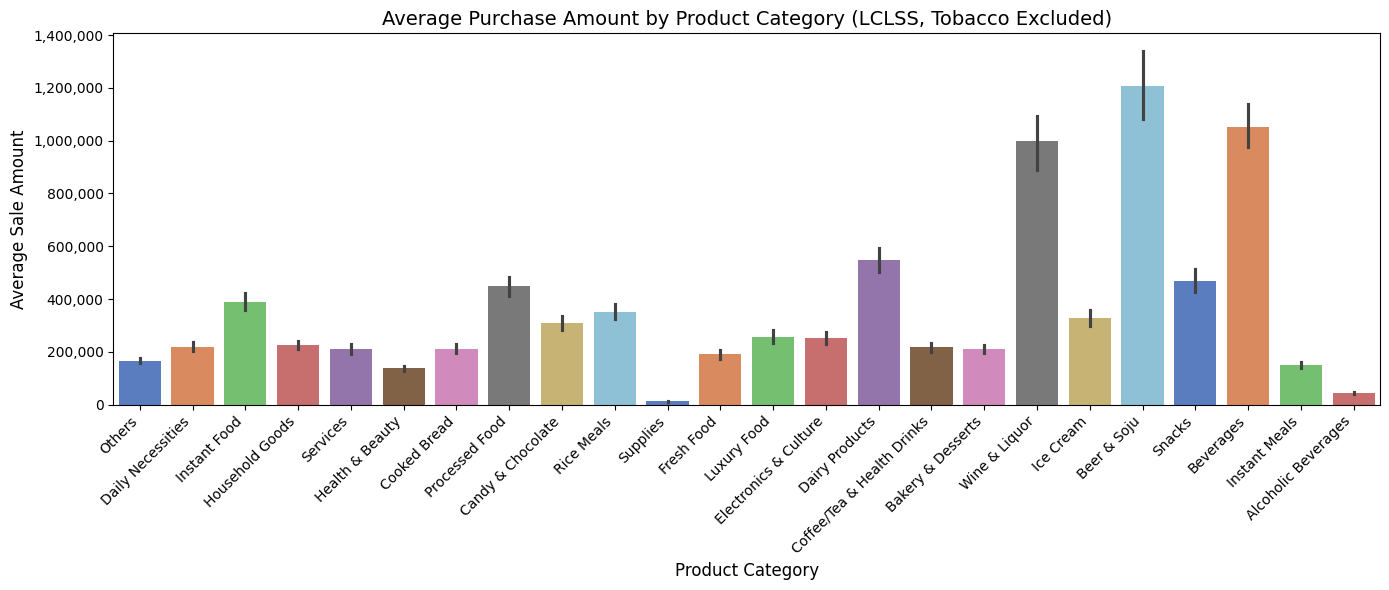

In [ ]:
#담배 제외한 그래프
# Tobacco 제외
filtered_df = df[df['lclss_label'] != 'Tobacco']

# 그래프 그리기
plt.figure(figsize=(14,6))
sns.barplot(data=filtered_df, x='lclss_label', y='sale_amt', palette='muted')

plt.title("Average Purchase Amount by Product Category (LCLSS, Tobacco Excluded)", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Average Sale Amount", fontsize=12)

# y축 숫자 일반 표기로
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# x축 글자 겹침 방지
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


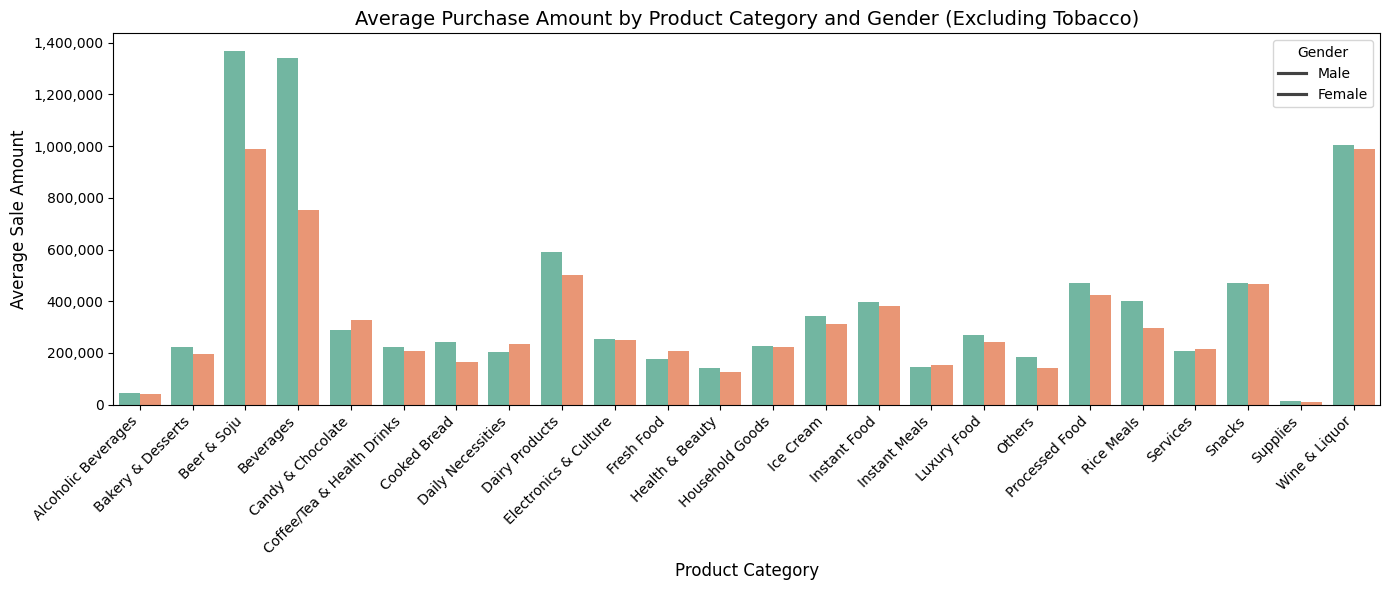

In [ ]:
# 담배(Tobacco) 제외한 데이터만 필터링
filtered_df = df[df['lclss_label'] != 'Tobacco']

# 성별에 따른 평균 구매금액 계산 (필터된 데이터 기준)
category_sex_mean = (
    filtered_df.groupby(['lclss_label', 'sex'])['sale_amt']
    .mean()
    .reset_index()
)

# 시각화
plt.figure(figsize=(14, 6))
sns.barplot(data=category_sex_mean, x='lclss_label', y='sale_amt', hue='sex', palette='Set2')

plt.title("Average Purchase Amount by Product Category and Gender (Excluding Tobacco)", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Average Sale Amount", fontsize=12)
plt.xticks(rotation=45, ha='right')

# y축 천단위 콤마 표시
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(title='Gender', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()


In [ ]:
region_labels = {
    11: "Seoul",
    26: "Busan",
    27: "Daegu",
    28: "Incheon",
    29: "Gwangju",
    30: "Daejeon",
    31: "Ulsan",
    36: "Sejong",
    41: "Gyeonggi-do",
    43: "Chungcheongbuk-do",
    44: "Chungcheongnam-do",
    46: "Jeollanam-do",
    47: "Gyeongsangbuk-do",
    48: "Gyeongsangnam-do",
    50: "Jeju-do",
    51: "Gangwon-do",
    52: "Jeollabuk-do"
}


/tmp/ipython-input-1313768456.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_mean, x='region_label', y='sale_amt', palette='Blues_d')


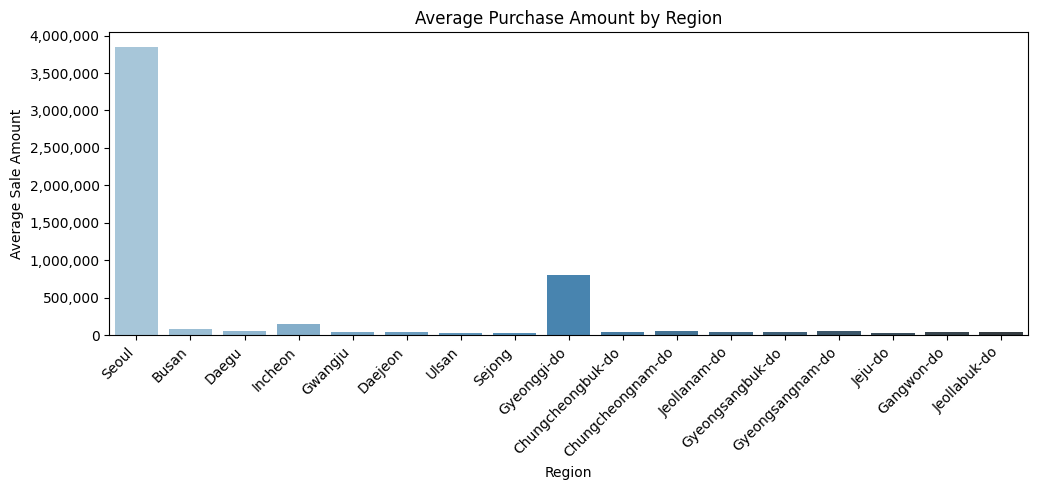

In [ ]:
#지역별(행정구역 코드) 매출 분포
df['cst_addr_no'] = df['cst_addr_no'].astype(int) # 지역코드 int로

region_mean = df.groupby('cst_addr_no', as_index=False)['sale_amt'].mean() # 집계

region_mean['region_label'] = region_mean['cst_addr_no'].map(region_labels) #라벨 컬럼 추가

plt.figure(figsize=(10,5)) # 시각화
sns.barplot(data=region_mean, x='region_label', y='sale_amt', palette='Blues_d')
plt.title("Average Purchase Amount by Region")
plt.xlabel("Region")
plt.ylabel("Average Sale Amount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

/tmp/ipython-input-310088442.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_mean, x='region_label', y='sale_amt', palette='Blues_d')


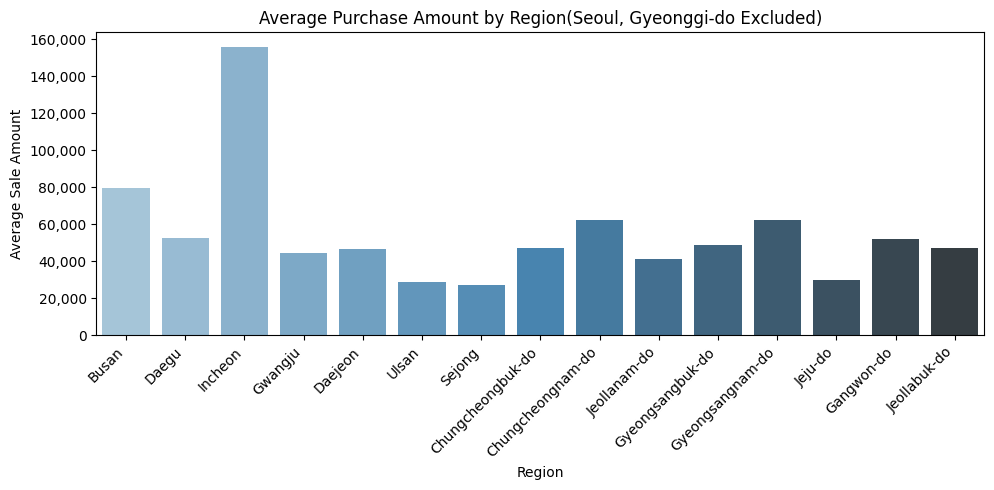

In [ ]:
#경기도 서울 제외
df['cst_addr_no'] = df['cst_addr_no'].astype(int) # 지역코드 int로

region_mean = df.groupby('cst_addr_no', as_index=False)['sale_amt'].mean() # 집계

region_mean['region_label'] = region_mean['cst_addr_no'].map(region_labels) #라벨 컬럼 추가
region_mean = region_mean[region_mean['region_label'] != 'Seoul']
region_mean = region_mean[region_mean['region_label'] != 'Gyeonggi-do']

plt.figure(figsize=(10,5)) # 시각화
sns.barplot(data=region_mean, x='region_label', y='sale_amt', palette='Blues_d')
plt.title("Average Purchase Amount by Region(Seoul, Gyeonggi-do Excluded)")
plt.xlabel("Region")
plt.ylabel("Average Sale Amount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

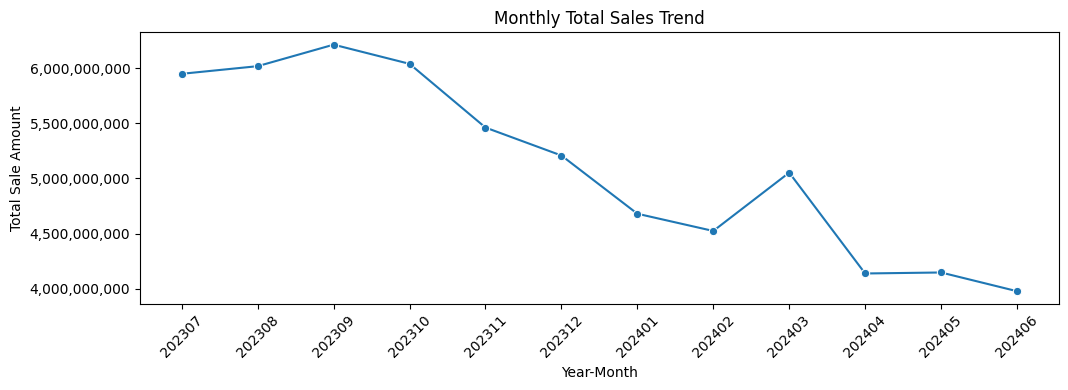

In [ ]:
# 월별 매출 추이 (YYYYMM 기준)
monthly_sales = df.groupby('yyyymm')['sale_amt'].sum().reset_index()

# yyyymm을 문자열로 변환
monthly_sales['yyyymm'] = monthly_sales['yyyymm'].astype(str)

plt.figure(figsize=(10,4))
sns.lineplot(data=monthly_sales, x='yyyymm', y='sale_amt', marker='o')

plt.title('Monthly Total Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sale Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

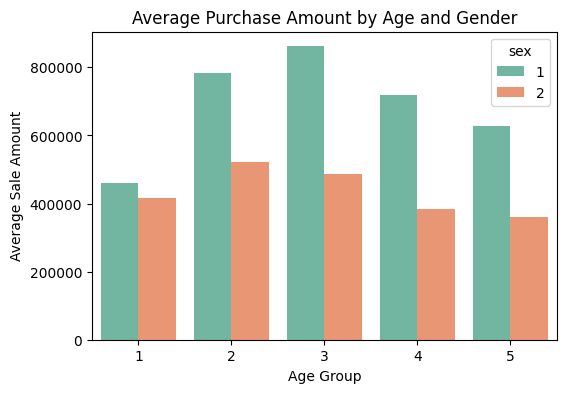

In [ ]:
#연령대 × 성별 교차 소비 패턴
age_sex_mean = df.groupby(['age', 'sex'])['sale_amt'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=age_sex_mean, x='age', y='sale_amt', hue='sex', palette='Set2')
plt.title("Average Purchase Amount by Age and Gender")
plt.xlabel("Age Group"); plt.ylabel("Average Sale Amount")
plt.show()

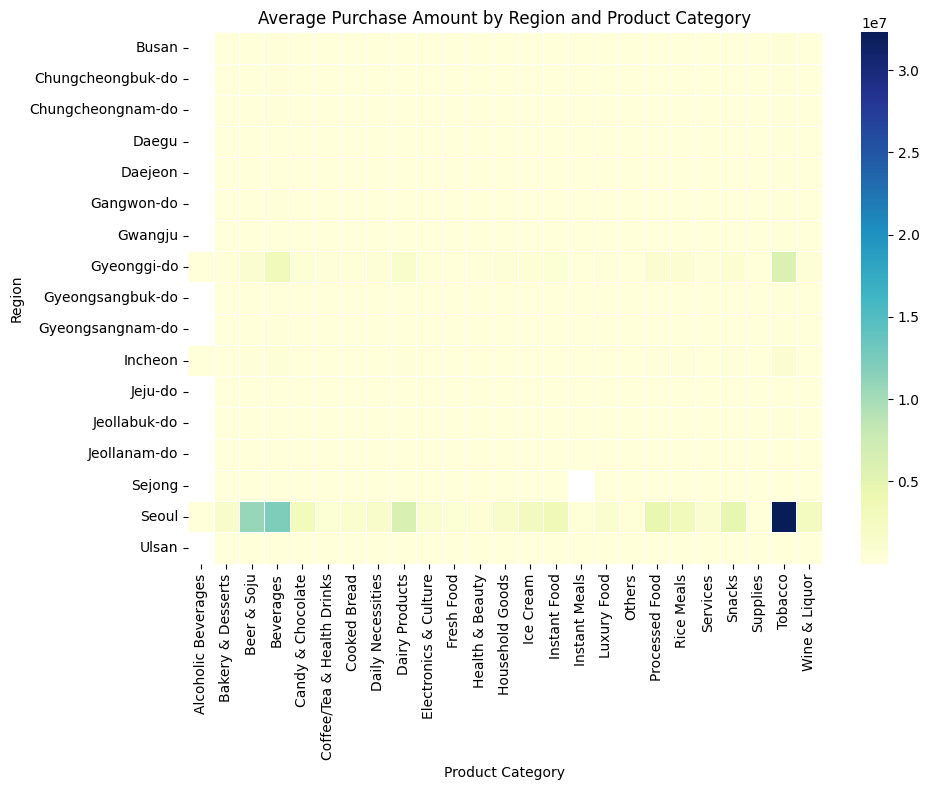

In [ ]:
#지역별 주요 소비 품목 상위 시각화 (히트맵)
df['region_label'] = df['cst_addr_no'].map(region_labels)
region_category = df.groupby(['region_label', 'lclss_label'])['sale_amt'].mean().unstack()
plt.figure(figsize=(10,8))
sns.heatmap(region_category, cmap='YlGnBu', linewidths=0.5)
plt.title('Average Purchase Amount by Region and Product Category')
plt.xlabel('Product Category'); plt.ylabel('Region')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Average Purchase Amount by Region and Product Category(z-score)')

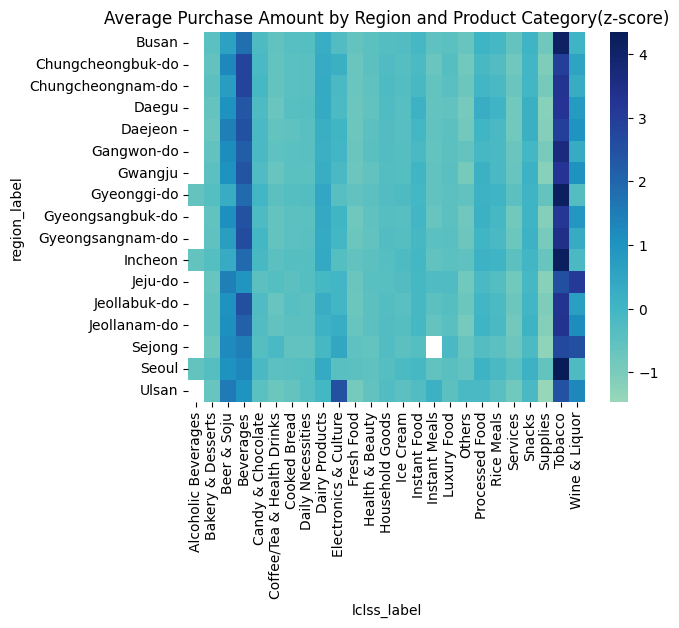

In [ ]:
#Z-score 표준화 히트맵
region_z = region_category.apply(lambda r: (r - r.mean())/r.std(ddof=0), axis=1)
sns.heatmap(region_z, cmap='YlGnBu', center=0)
plt.title('Average Purchase Amount by Region and Product Category(z-score)')

Text(0.5, 1.0, 'Average Purchase Amount by Region and Product Category(log scale)')

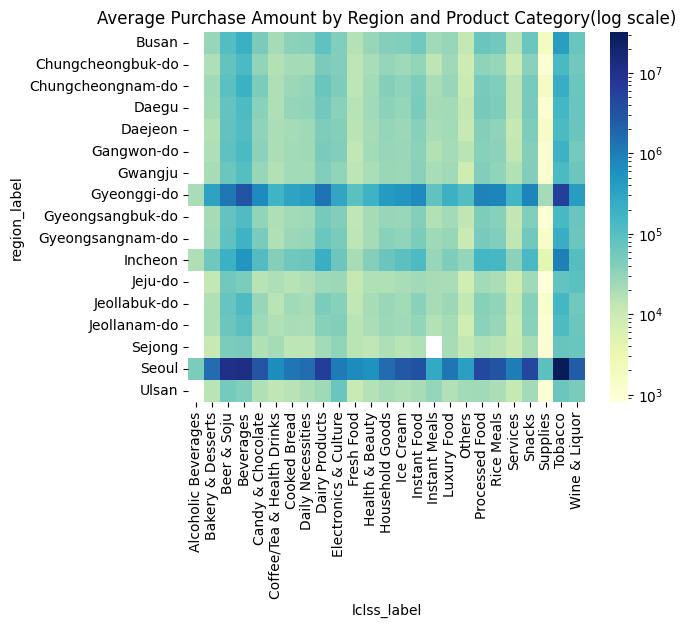

In [ ]:
#로그 스케일 히트맵
sns.heatmap(region_category, cmap='YlGnBu',
            norm=colors.LogNorm(vmin=max(region_category.min().min(),1),  # 0 회피
                                vmax=region_category.max().max()))
plt.title('Average Purchase Amount by Region and Product Category(log scale)')

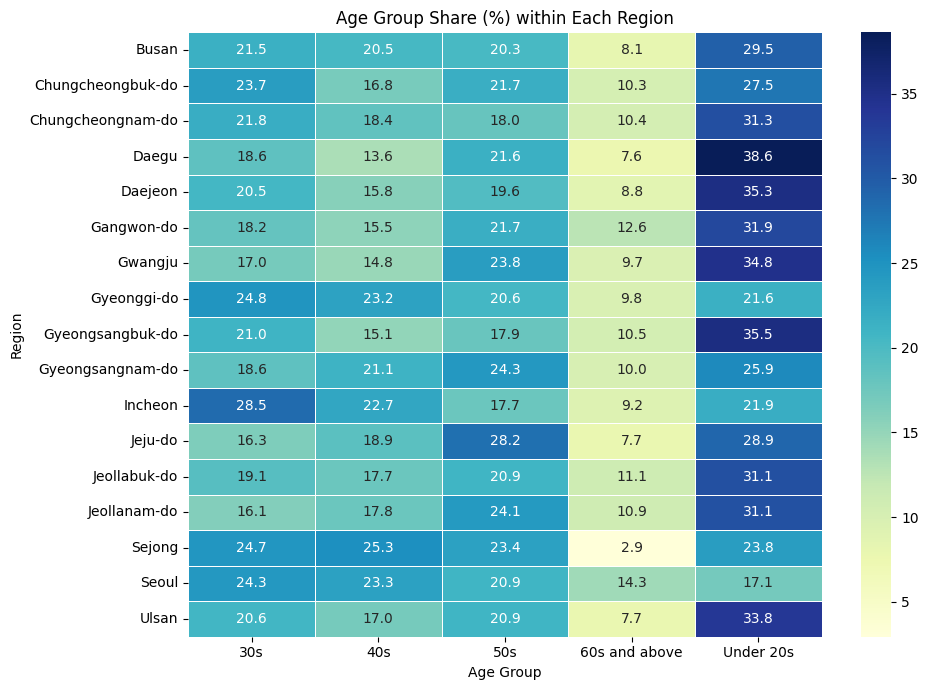

In [ ]:
# 지역별 연령대 소비 비중(%) 히트맵
# 지역×연령대 총액
region_age = (
    df.groupby(['region_label', 'age_label'], as_index=False)['sale_amt']
      .sum()
)

# 지역 내부 비중(%) 계산: transform으로 인덱스 맞추기
region_age['region_share'] = (
    region_age['sale_amt'] /
    region_age.groupby('region_label')['sale_amt'].transform('sum') * 100
)

# 히트맵용 피벗
region_age_pivot = (
    region_age.pivot(index='region_label', columns='age_label', values='region_share')
               .fillna(0)
)


plt.figure(figsize=(10,7))
sns.heatmap(region_age_pivot, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.5)
plt.title('Age Group Share (%) within Each Region')
plt.xlabel('Age Group'); plt.ylabel('Region')
plt.tight_layout(); plt.show()



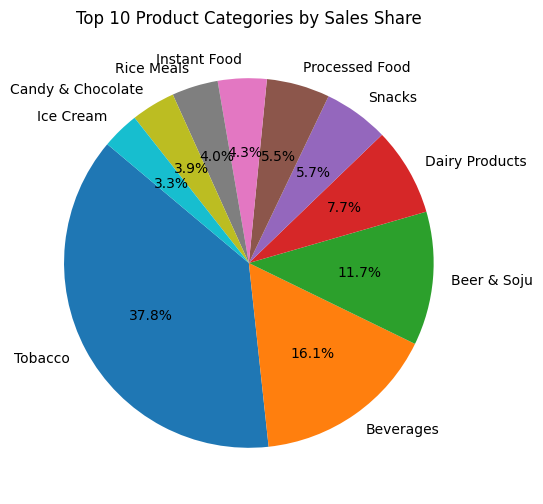

In [ ]:
#카테고리별 점유율 Pie Chart (비중 시각화)
category_share = df.groupby('lclss_label')['sale_amt'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(6,6))
plt.pie(category_share, labels=category_share.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Product Categories by Sales Share')
plt.show()


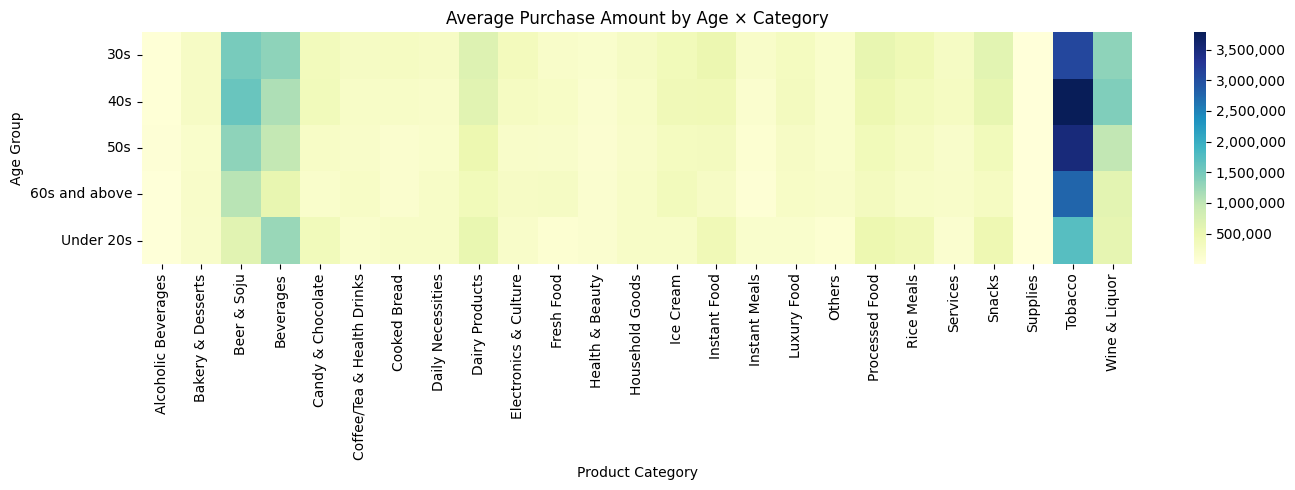

In [ ]:
#연령대 × 품목별 평균 구매금액 히트맵
age_cat_mean = (
    df.groupby(['age_label','lclss_label'])['sale_amt']
      .mean()
      .reset_index()
      .pivot(index='age_label', columns='lclss_label', values='sale_amt')
)

plt.figure(figsize=(14,5))
ax = sns.heatmap(age_cat_mean, cmap='YlGnBu')
ax.set_title('Average Purchase Amount by Age × Category')
ax.set_xlabel('Product Category'); ax.set_ylabel('Age Group')
# 천단위 콤마
ax.figure.axes[-1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.tight_layout(); plt.show()


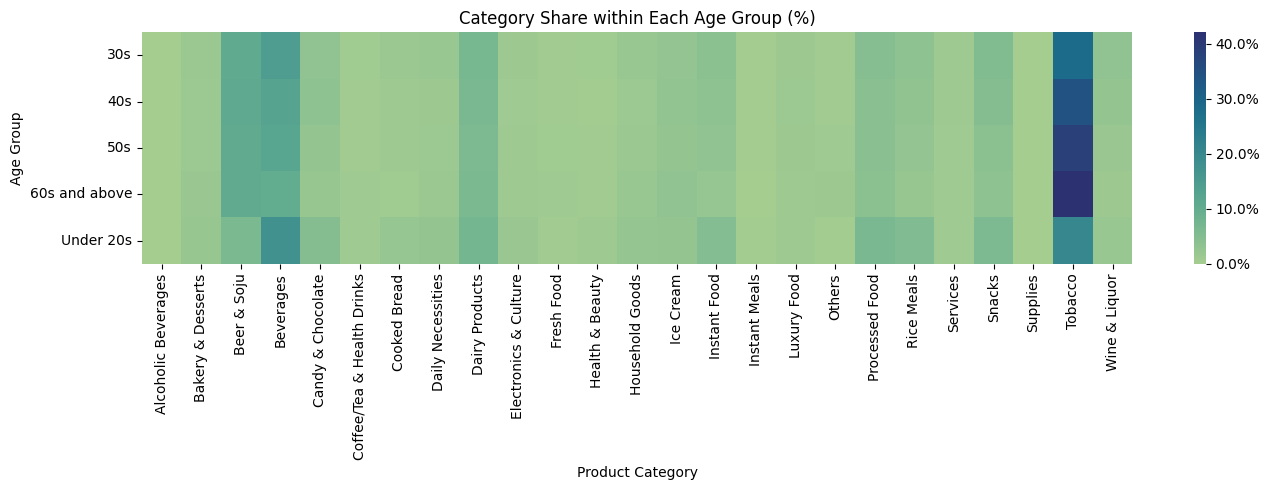

In [ ]:
#상대 성향: 연령대 내부 비중(%) 히트맵
age_cat_sum = (
    df.groupby(['age_label','lclss_label'])['sale_amt']
      .sum()
      .reset_index()
      .pivot(index='age_label', columns='lclss_label', values='sale_amt')
)

# 연령대별 행 합으로 100% 정규화
age_cat_share = age_cat_sum.div(age_cat_sum.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14,5))
ax = sns.heatmap(age_cat_share, cmap='crest', vmin=0, vmax=age_cat_share.max().max())
ax.set_title('Category Share within Each Age Group (%)')
ax.set_xlabel('Product Category'); ax.set_ylabel('Age Group')
ax.figure.axes[-1].yaxis.set_major_formatter(mticker.PercentFormatter())
plt.tight_layout(); plt.show()


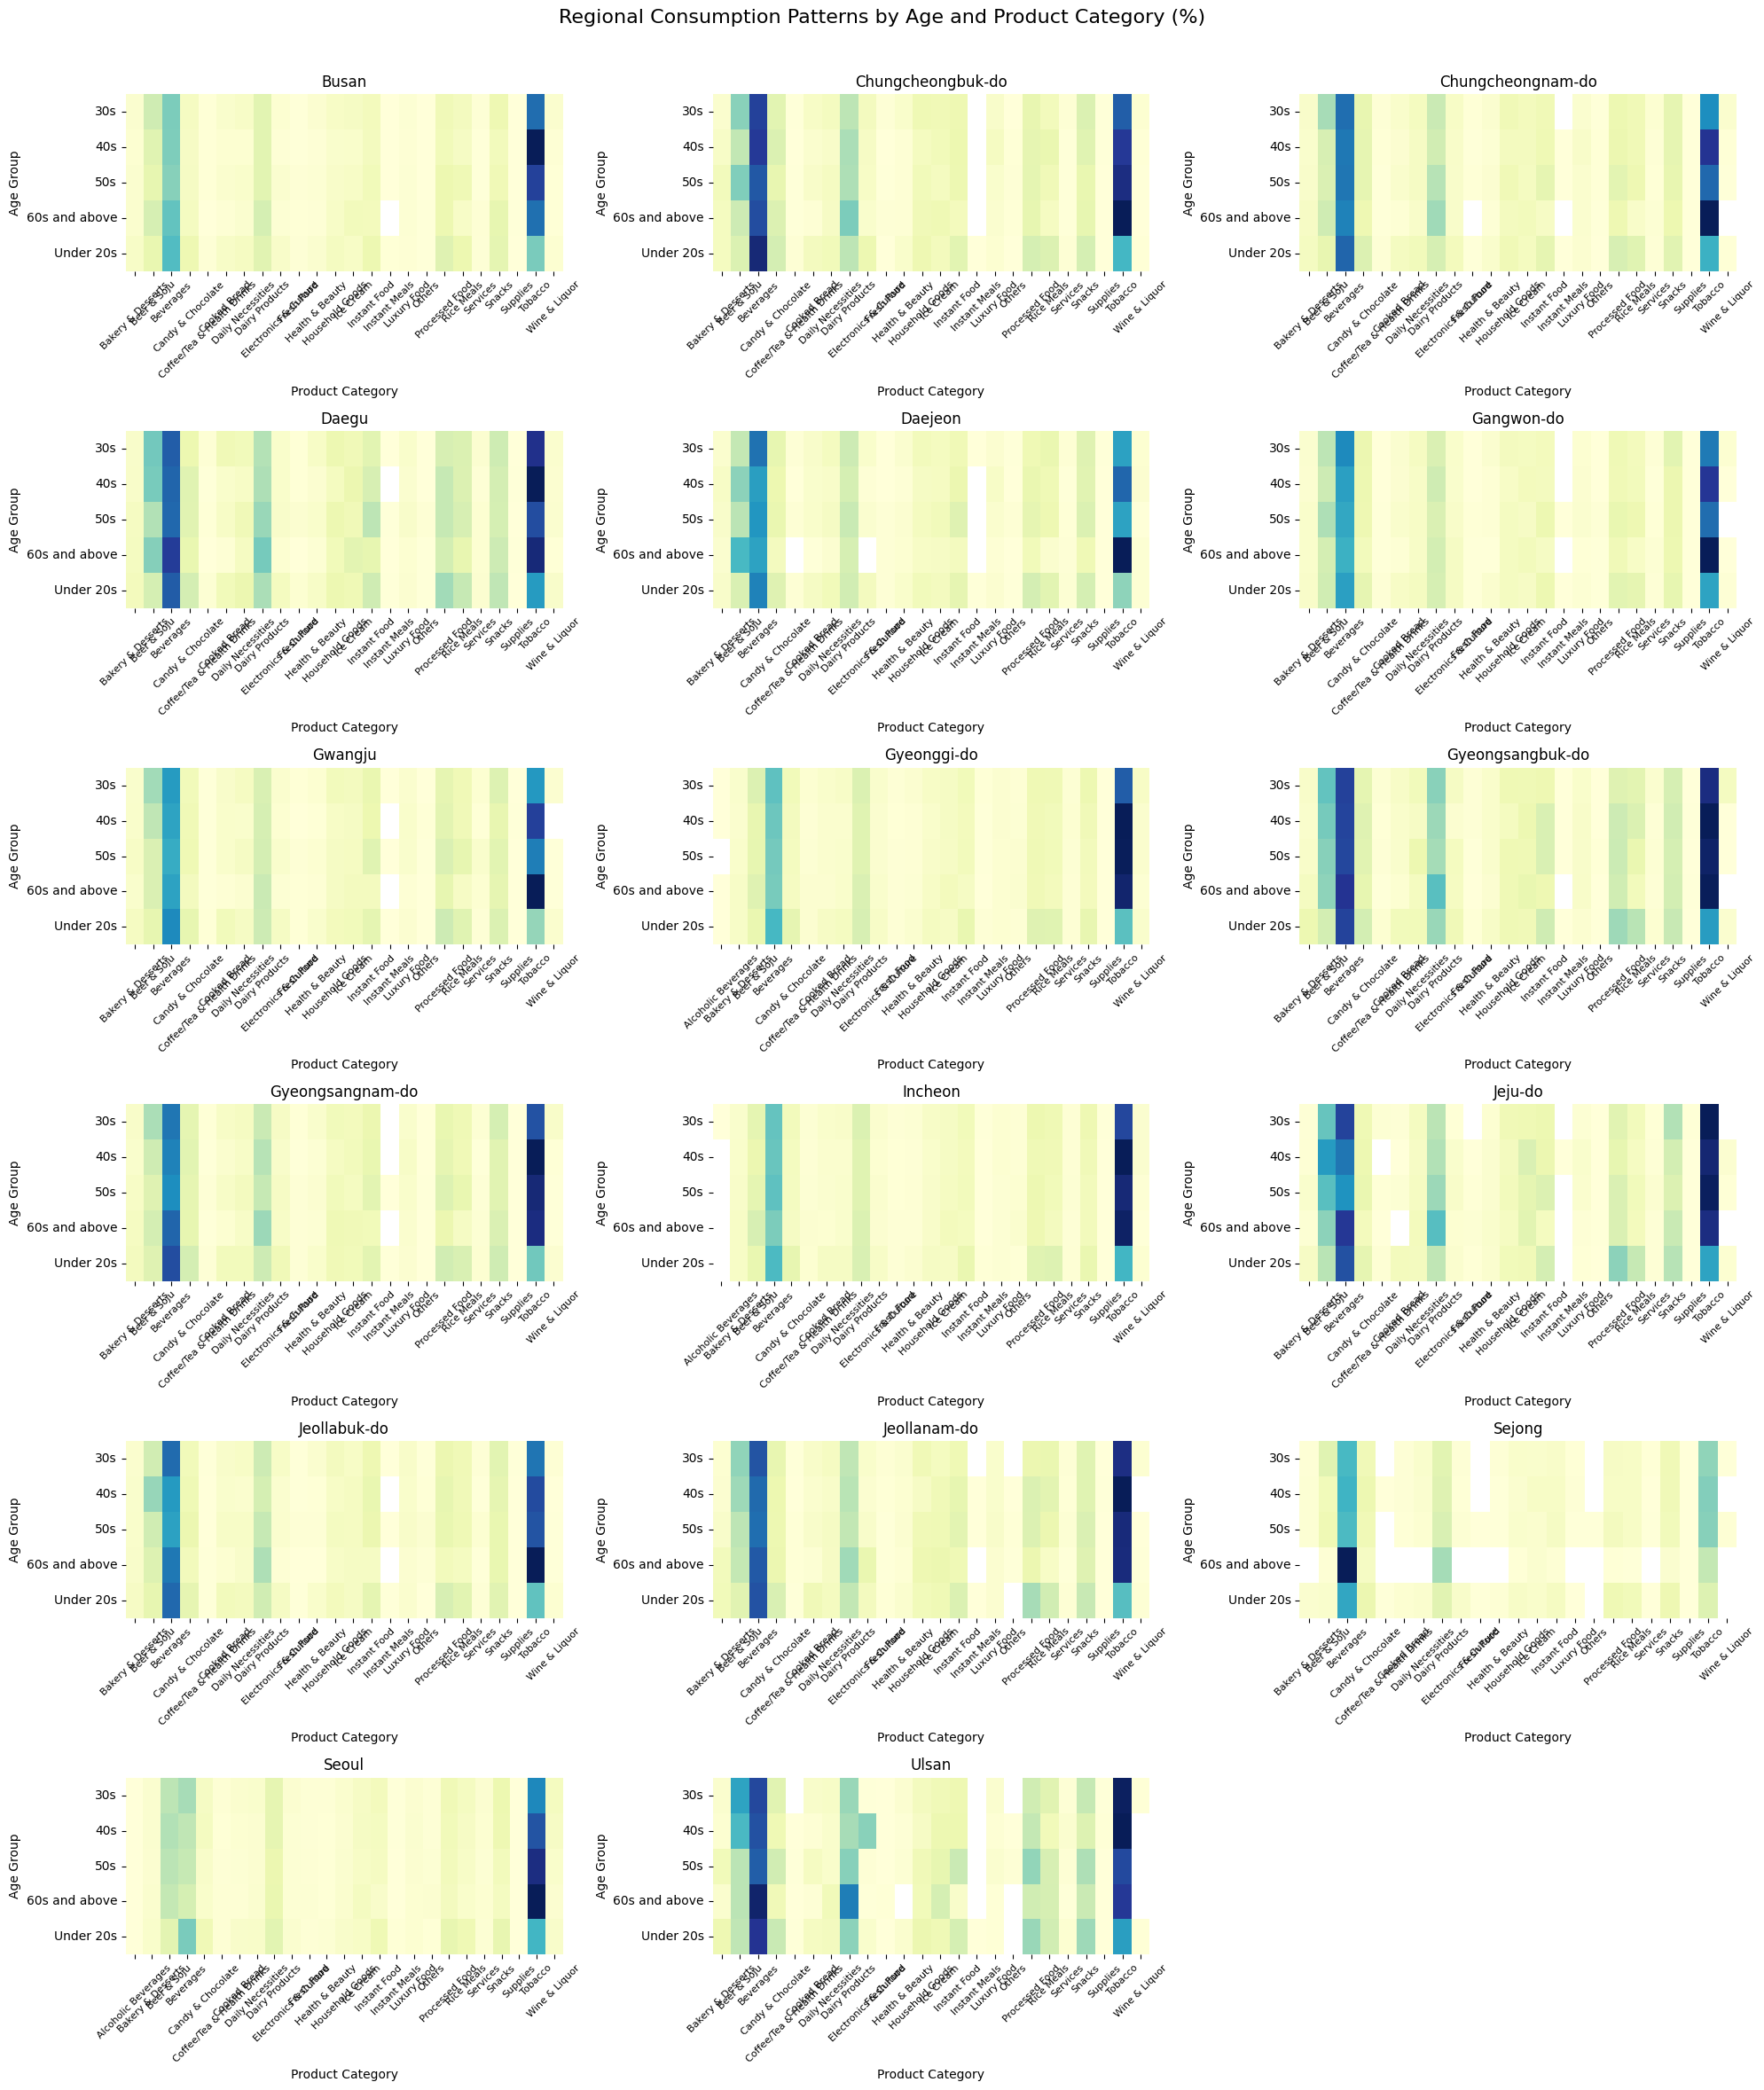

In [ ]:
# 지역 × 연령대 × 품목별 총 구매금액 집계
region_age_cat = (
    df.groupby(['region_label', 'age_label', 'lclss_label'])['sale_amt']
      .sum()
      .reset_index()
)

# 지역 × 연령대별로 정규화 (각 지역 내에서 연령대별 품목 소비 비중 100%)
region_age_cat['share'] = (
    region_age_cat.groupby(['region_label', 'age_label'])['sale_amt']
      .transform(lambda x: x / x.sum() * 100)
)

# 지역별 subplot으로 시각화
regions = region_age_cat['region_label'].unique()
n_regions = len(regions)

fig, axes = plt.subplots(
    nrows=(n_regions + 2)//3, ncols=3, figsize=(20, 4*((n_regions + 2)//3))
)
axes = axes.flatten()

for i, region in enumerate(regions):
    sub = region_age_cat[region_age_cat['region_label'] == region]
    pivot = sub.pivot(index='age_label', columns='lclss_label', values='share')
    sns.heatmap(pivot, cmap='YlGnBu', ax=axes[i], cbar=False)
    axes[i].set_title(region)
    axes[i].set_xlabel('Product Category')
    axes[i].set_ylabel('Age Group')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)

# 남는 subplot 숨기기
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Regional Consumption Patterns by Age and Product Category (%)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


lclss_label
Tobacco           1.542306e+14
Beer & Soju       2.258231e+13
Beverages         1.457979e+13
Wine & Liquor     4.019436e+12
Dairy Products    3.706553e+12
Name: sale_amt, dtype: float64


/tmp/ipython-input-3179668143.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_by_category.head(10).index, y=variance_by_category.head(10).values, palette='muted')


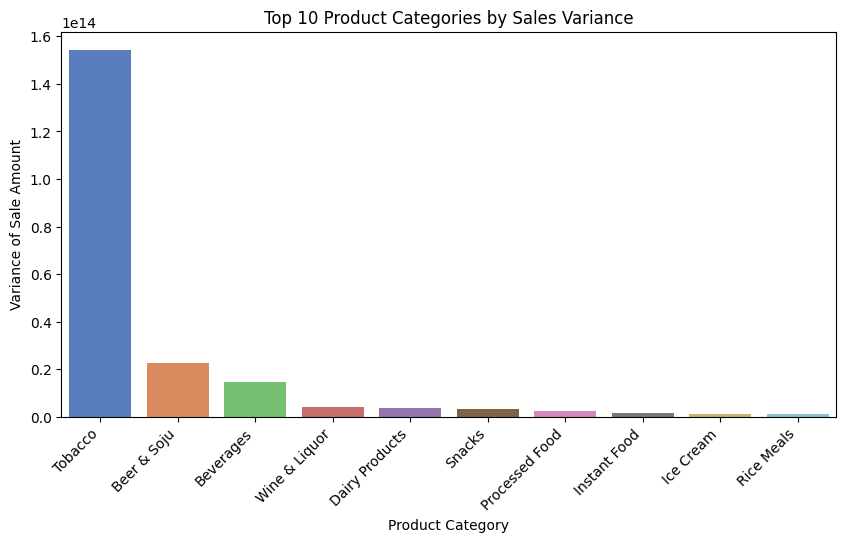

In [ ]:
# 업종별 매출 분산 확인
variance_by_category = df.groupby('lclss_label')['sale_amt'].var().sort_values(ascending=False)
print(variance_by_category.head(5))

# 시각화
plt.figure(figsize=(10,5))
sns.barplot(x=variance_by_category.head(10).index, y=variance_by_category.head(10).values, palette='muted')
plt.title('Top 10 Product Categories by Sales Variance')
plt.xlabel('Product Category')
plt.ylabel('Variance of Sale Amount')
plt.xticks(rotation=45, ha='right')
plt.show()


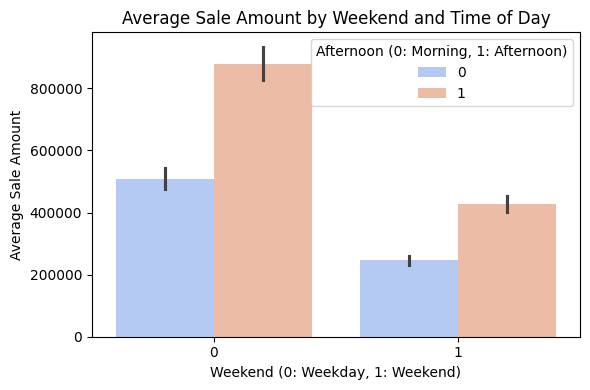

In [ ]:
# 주말/시간대 교차 효과 분석
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='weekend', y='sale_amt', hue='aftern', palette='coolwarm')
plt.title('Average Sale Amount by Weekend and Time of Day')
plt.xlabel('Weekend (0: Weekday, 1: Weekend)')
plt.ylabel('Average Sale Amount')
plt.legend(title='Afternoon (0: Morning, 1: Afternoon)')
plt.tight_layout()
plt.show()


#4. 기계학습

In [ ]:
print("컬럼명:\n", df.columns)

컬럼명:
 Index(['yyyymm', 'sex', 'age', 'cst_addr_no', 'weekend', 'aftern', 'lclss',
       'sale_qty', 'sale_amt', 'sale_cnt', 'age_label', 'lclss_label',
       'region_label'],
      dtype='object')


In [ ]:
# 전처리  다시하기 (밑에서 에러 발생)
categorical_features = ['sex', 'age', 'cst_addr_no', 'weekend', 'aftern', 'lclss']
numeric_features     = ['sale_qty']   # <- sale_cnt, sale_amt 제외

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ]
)

In [ ]:
# 훈련/테스트 데이터 분리 + 전처리 적용

# 타깃(y)과 입력(X) 분리
X = df.drop(['sale_amt', 'yyyymm','age_label','lclss_label','region_label','sale_cnt'], axis=1) #상관관계가 높은 sale_cnt 제거
y = df['sale_amt']

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTrain: {X_train.shape}, Test: {X_test.shape}")

# ColumnTransformer 적용
X_train_preprocessed = preprocess.fit_transform(X_train)
X_test_preprocessed = preprocess.transform(X_test)

print(f"\n전처리 후 X_train shape: {X_train_preprocessed.shape}")
print(f"전처리 후 X_test shape: {X_test_preprocessed.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


Train: (86002, 7), Test: (21501, 7)

전처리 후 X_train shape: (86002, 54)
전처리 후 X_test shape: (21501, 54)
y_train shape: (86002,), y_test shape: (21501,)


In [ ]:
print("컬럼명:\n", X.columns)

컬럼명:
 Index(['sex', 'age', 'cst_addr_no', 'weekend', 'aftern', 'lclss', 'sale_qty'], dtype='object')


In [ ]:
# 전처리 + 모델 파이프라인
lr_model = Pipeline([
    ('preprocess', preprocess),
    ('model', LinearRegression())
])

# 학습
lr_model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² = {r2:.3f}, RMSE = {rmse:,.2f}")

R² = 0.767, RMSE = 1,711,459.79


/tmp/ipython-input-961363372.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(15), x='Coefficient', y='Feature', palette='coolwarm')


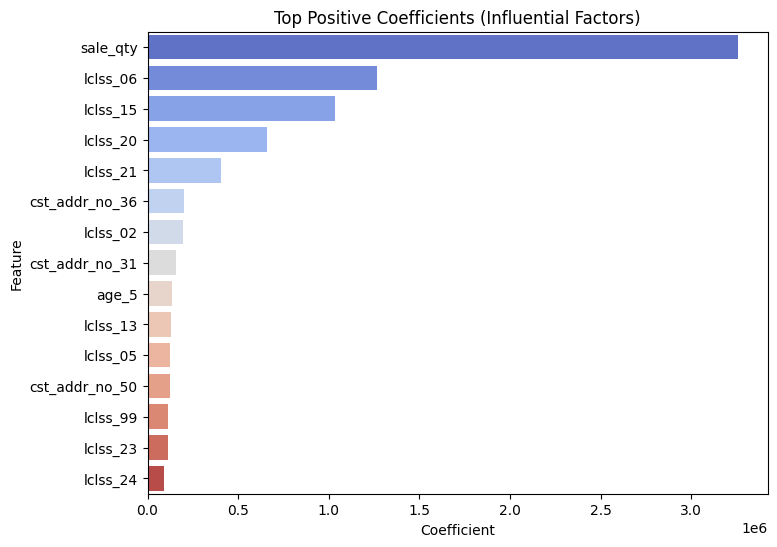

In [ ]:
# 회귀 계수 추출
coef = lr_model.named_steps['model'].coef_
features = lr_model.named_steps['preprocess'].get_feature_names_out()

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df['Feature'] = coef_df['Feature'].str.replace(r'^(num__|cat__)', '', regex=True)

# 상위 영향 변수 시각화
plt.figure(figsize=(8,6))
sns.barplot(data=coef_df.head(15), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Top Positive Coefficients (Influential Factors)")
plt.show()


In [ ]:
# 다항회귀 파이프라인
poly_model = Pipeline([
    ('preprocess', preprocess),                    # ColumnTransformer (OHE + Scaling)
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # 2차항까지 확장
    ('model', LinearRegression())
])

# 학습
poly_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = poly_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² = {r2:.3f}")
print(f"RMSE = {rmse:,.2f}")

R² = 0.997
RMSE = 207,837.64


/tmp/ipython-input-1280363717.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(20), x='Coefficient', y='Feature', palette='coolwarm')


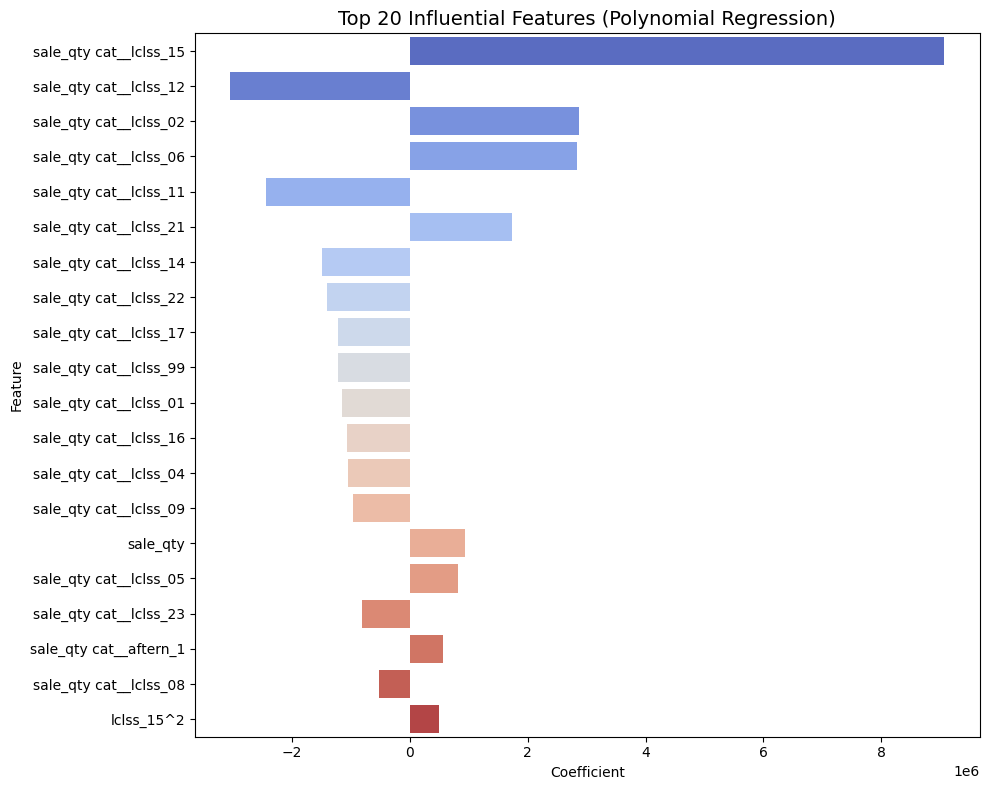

In [ ]:
# 다항회귀 모델의 계수 추출
coef = poly_model.named_steps['model'].coef_                # 회귀계수
poly = poly_model.named_steps['poly']                       # PolynomialFeatures 객체
feature_names = poly_model.named_steps['preprocess'].get_feature_names_out()  # 기존 피처 이름

# 다항항 확장된 이름 만들기
poly_feature_names = poly.get_feature_names_out(feature_names)

# 계수와 이름 DataFrame으로 정리
coef_df = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': coef
})
coef_df['Feature'] = coef_df['Feature'].str.replace(r'^(num__|cat__)', '', regex=True)

# 절댓값 기준 상위 영향 변수 보기
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# 시각화 (상위 20개만 표시)
plt.figure(figsize=(10, 8))
sns.barplot(data=coef_df.head(20), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Top 20 Influential Features (Polynomial Regression)", fontsize=14)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



In [ ]:
from xgboost import XGBRegressor
xgb_model = Pipeline([
    ('preprocess', preprocess),
    ('model', XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42))
])

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"[XGBoost] R² = {r2:.3f}, RMSE = {rmse:,.2f}")


[XGBoost] R² = 0.982, RMSE = 470,721.80


In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Pipeline([
    ('preprocess', preprocess),
    ('model', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"[Ridge] R² = {r2:.3f}, RMSE = {rmse:,.2f}")


[Ridge] R² = 0.767, RMSE = 1,711,464.22


In [ ]:
lasso_model = Pipeline([
    ('preprocess', preprocess),
    ('model', Lasso(alpha=0.001, max_iter=5000))
])
lasso_model.fit(X_train, y_train)
print("남은 변수 수:", np.sum(lasso_model.named_steps['model'].coef_ != 0))


남은 변수 수: 54


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.010e+16, tolerance: 1.140e+14
  model = cd_fast.enet_coordinate_descent(


In [ ]:
y_pred = lasso_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"[Ridge] R² = {r2:.3f}, RMSE = {rmse:,.2f}")

[Ridge] R² = 0.767, RMSE = 1,711,459.79


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = Pipeline([
    ('preprocess', preprocess),
    ('model', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42))
])

gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"[GradientBoosting] R² = {r2:.3f}, RMSE = {rmse:,.2f}")


[GradientBoosting] R² = 0.995, RMSE = 245,467.05


In [ ]:
from lightgbm import LGBMRegressor

lgbm_model = Pipeline([
    ('preprocess', preprocess),
    ('model', LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42))
])

lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"[LightGBM] R² = {r2:.3f}, RMSE = {rmse:,.2f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 86002, number of used features: 54
[LightGBM] [Info] Start training from score 576927.894700


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] R² = 0.983, RMSE = 467,989.14
